In [536]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

black image

In [537]:
width, height = 64, 64
feature_size = 16
feature_x = 24
feature_y = 24

factor = 0.001

In [538]:
kernel = np.zeros((height, width), dtype=np.uint8)
# Draw a white rectangle on the black image
feature = cv2.rectangle(kernel, (feature_x, feature_y), (feature_x + feature_size, feature_y + feature_size), 255, -1)
kernel = (kernel//255)*factor


Show the image and the features

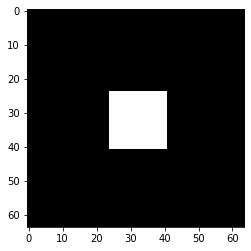

In [539]:
plt.imshow(kernel,cmap="gray")

original image

In [540]:
original_image = cv2.imread("../test.png")
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
inverted_image = 255 - gray_image

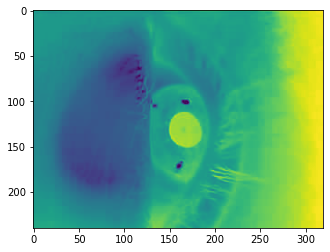

In [541]:
plt.imshow(inverted_image)

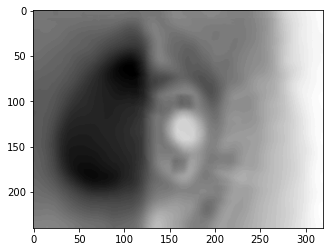

In [542]:
result = cv2.filter2D(inverted_image, -1, kernel)
plt.imshow(result,cmap="gray")

white border detection

In [543]:
margin = 40

In [544]:
height,width = inverted_image.shape

In [545]:
roi = inverted_image[:,width-margin:width]

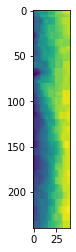

In [546]:
plt.imshow(roi)

In [547]:
average_pixel_value = cv2.mean(roi)[0]

# Print the average pixel value
print("Average Pixel Value:", average_pixel_value)

Average Pixel Value: 215.3426041666667


In [548]:
if average_pixel_value > 210:
    inverted_image = inverted_image[:,:width-roi.shape[1]] 

In [549]:
gray_image[:64,:64]

array([[ 97, 100, 104, ..., 105, 106, 106],
       [117, 120, 123, ..., 123, 124, 124],
       [132, 134, 137, ..., 136, 136, 136],
       ...,
       [138, 138, 138, ..., 162, 162, 163],
       [138, 138, 138, ..., 162, 163, 163],
       [138, 138, 138, ..., 163, 163, 163]], dtype=uint8)

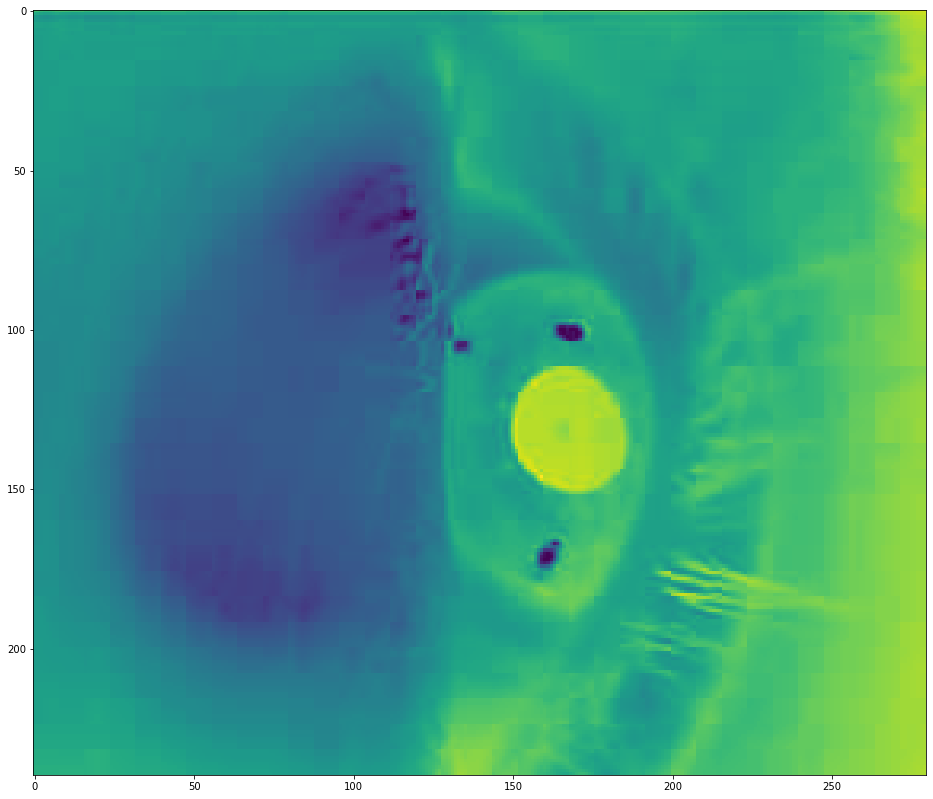

In [550]:
new_img = inverted_image

fig, ax = plt.subplots(figsize=(16,16))

im = ax.imshow(new_img)


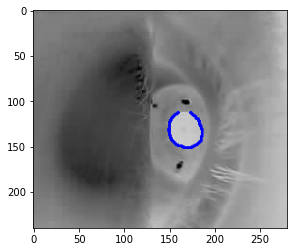

In [551]:
# Apply Canny edge detection
edges = cv2.Canny(new_img, 50, 200)

# Find contours in the edge image
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Extract edge segments
edge_segments = []
for contour in contours:
    # Filter out small contours
    if cv2.contourArea(contour) > 100:  # Adjust the minimum area threshold as needed
        # Extract segment coordinates
        segment = contour.squeeze().tolist()
        edge_segments.append(segment)

# Display the original image with detected edge segments
image_with_segments = cv2.cvtColor(new_img, cv2.COLOR_GRAY2BGR)
for segment in edge_segments:
    for i in range(len(segment) - 1):
        cv2.line(image_with_segments, tuple(segment[i]), tuple(segment[i + 1]), (0, 0, 255), 2)

plt.imshow(image_with_segments)


In [569]:
def filterImg(img):
    filtered = cv2.bilateralFilter(img, d=17, sigmaColor=75, sigmaSpace=75)

    # Perform edge detection
    edges = cv2.Canny(filtered, threshold1=30, threshold2=100)

    # Find contours in the edge image
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Extract edge segments
    edge_segments = []
    for contour in contours:
        # Filter out small contours
        if cv2.contourArea(contour) > 100:  # Adjust the minimum area threshold as needed
            # Extract segment coordinates
            segment = contour.squeeze().tolist()
            edge_segments.append(segment)

    # Display the original image with detected edge segments
    image_with_segments = new_img.copy()
    for segment in edge_segments:
        for i in range(len(segment) - 1):
            cv2.line(img, tuple(segment[i]), tuple(segment[i + 1]), (0, 0, 255), 2)
        
    

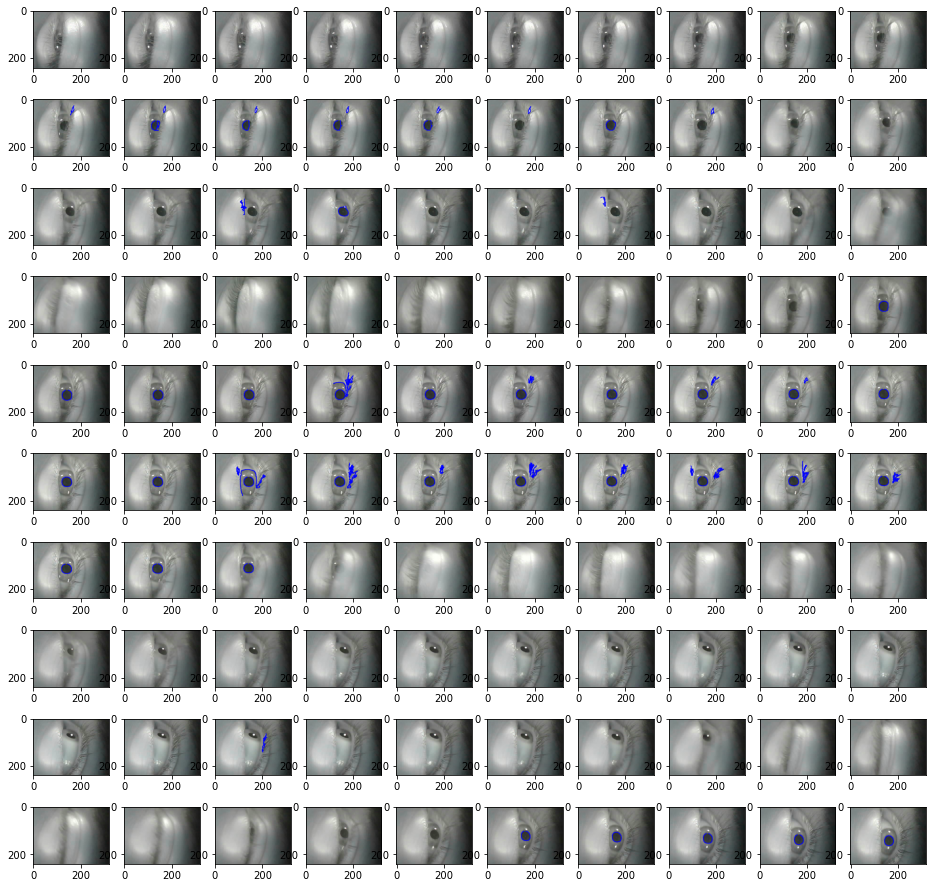

In [573]:
cap = cv2.VideoCapture("../outpy.avi")
fig,ax = plt.subplots(ncols=10,nrows=10,figsize=(16,16))

for i in range(10):
    for j in range(10):
        ret, img = cap.read()
        filterImg(img)
        ax[i,j].imshow(img)
        

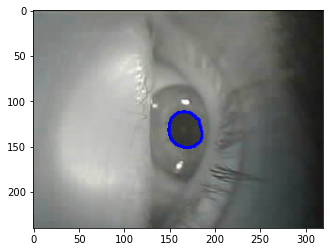

In [557]:
plt.imshow(original_image)